# EDA(Exploratory Data Analysis)

In [178]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

In [179]:
df = pd.read_parquet("cleaned_data.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63507 entries, 0 to 63506
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       63507 non-null  int64  
 1   Release date                63507 non-null  object 
 2   Estimated owners            63507 non-null  object 
 3   Price                       63507 non-null  float64
 4   Positive                    63507 non-null  int64  
 5   Negative                    63507 non-null  int64  
 6   Achievements                63507 non-null  int64  
 7   Average playtime forever    63507 non-null  int64  
 8   Average playtime two weeks  63507 non-null  int64  
 9   Median playtime forever     63507 non-null  int64  
 10  Median playtime two weeks   63507 non-null  int64  
 11  Developers                  63507 non-null  object 
 12  Publishers                  63507 non-null  object 
 13  Categories                  635

## Korelasyon Analizi

## Tüm Değişkenlerin Dağılımı (Histogram)

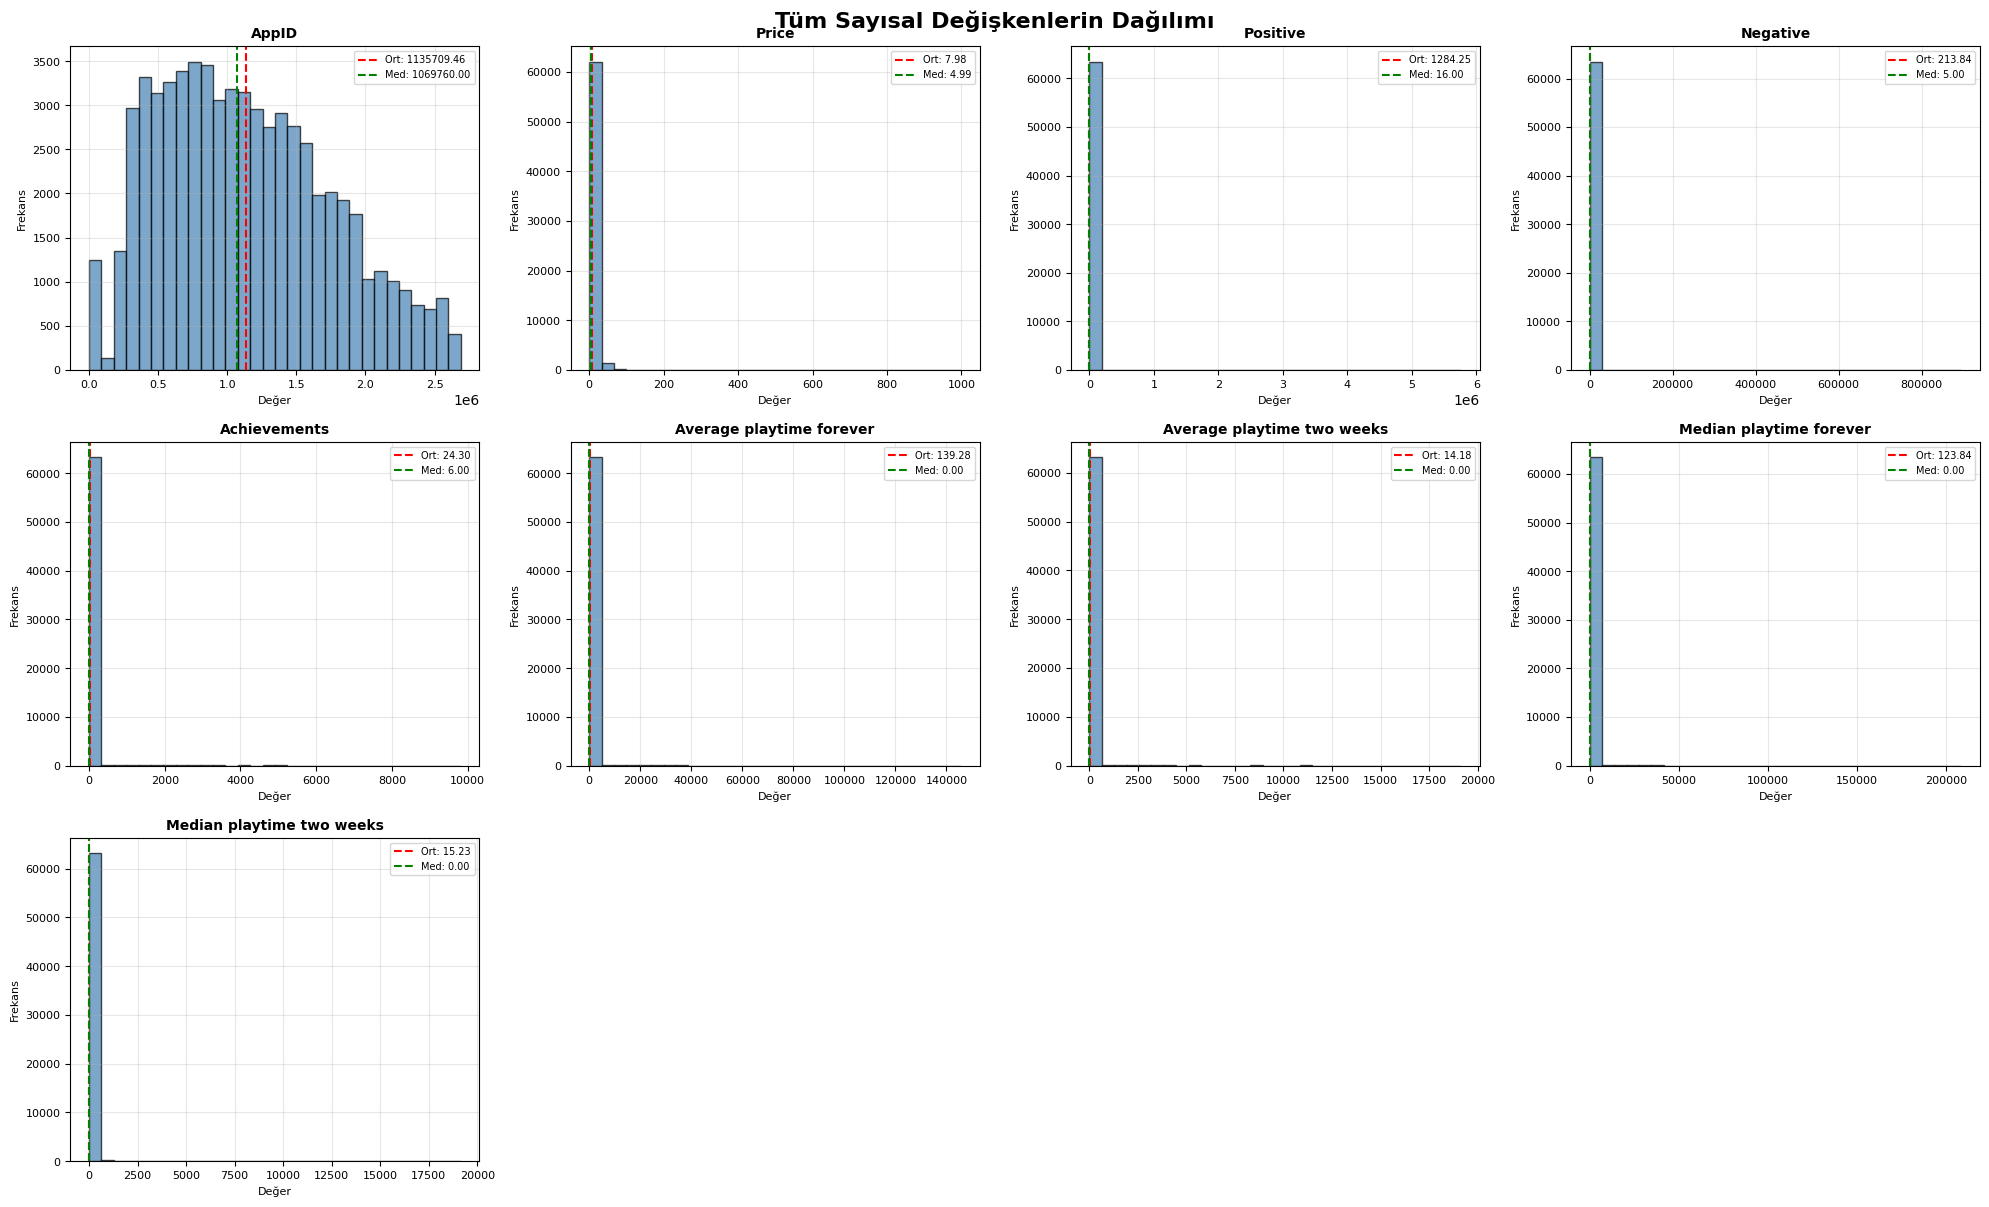


Toplam 9 sayısal değişken görselleştirildi.


In [180]:
import matplotlib.pyplot as plt
import numpy as np

# Sayısal sütunları belirle
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Toplam grafik sayısını hesapla
n_cols = 4  # Satır başına 4 grafik
n_rows = int(np.ceil(len(numeric_columns) / n_cols))

# Büyük bir figure oluştur (tüm grafikleri bir pencerede göstermek için)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # Düz bir array'e çevir

# Her sayısal değişken için histogram çiz
for idx, col in enumerate(numeric_columns):
    ax = axes[idx]
    
    # Histogram çiz
    ax.hist(df[col].dropna(), bins=30, color='steelblue', alpha=0.7, edgecolor='black')
    
    # Başlık ve etiketler
    ax.set_title(f'{col}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Değer', fontsize=8)
    ax.set_ylabel('Frekans', fontsize=8)
    ax.tick_params(labelsize=8)
    ax.grid(True, alpha=0.3)
    
    # Temel istatistikleri göster
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Ort: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=1.5, label=f'Med: {median_val:.2f}')
    ax.legend(fontsize=7)

# Kullanılmayan subplot'ları gizle
for idx in range(len(numeric_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Tüm Sayısal Değişkenlerin Dağılımı', fontsize=16, fontweight='bold', y=1.002)
plt.show()

print(f"\nToplam {len(numeric_columns)} sayısal değişken görselleştirildi.")

## Log Dönüşümü Gereksinimi Analizi

In [181]:
from scipy import stats

# Sayısal değişkenlerin çarpıklık (skewness) analizi
print("=" * 80)
print("ÇARPIKLIK ANALİZİ (Skewness)")
print("=" * 80)
print("\nÇarpıklık Değerleri:")
print("-" * 80)
print(f"{'Değişken':<30} {'Skewness':>12} {'Yorum':<30}")
print("-" * 80)

skewness_results = []
for col in numeric_columns:
    skew_value = df[col].skew()
    skewness_results.append({'column': col, 'skewness': skew_value})
    
    # Yorum
    if abs(skew_value) < 0.5:
        comment = "✅ Normal (dönüşüm gereksiz)"
    elif abs(skew_value) < 1:
        comment = "⚠️ Hafif çarpık"
    else:
        comment = "❌ Çok çarpık (LOG gerekli!)"
    
    print(f"{col:<30} {skew_value:>12.2f}  {comment}")

print("\n" + "=" * 80)
print("ÖNERİLER:")
print("=" * 80)

# Log dönüşümü yapılacak kolonları belirle
needs_log = [r['column'] for r in skewness_results if abs(r['skewness']) > 1]
somewhat_skewed = [r['column'] for r in skewness_results if 0.5 <= abs(r['skewness']) <= 1]
normal = [r['column'] for r in skewness_results if abs(r['skewness']) < 0.5]

print(f"\n1️⃣ LOG DÖNÜŞÜMÜ ŞART ({len(needs_log)} değişken):")
for col in needs_log:
    print(f"   - {col}")

print(f"\n2️⃣ HAFİF ÇARPIK - İsteğe Bağlı ({len(somewhat_skewed)} değişken):")
for col in somewhat_skewed:
    print(f"   - {col}")

print(f"\n3️⃣ NORMAL DAĞILIM - Dönüşüm Gereksiz ({len(normal)} değişken):")
for col in normal:
    print(f"   - {col}")

print("\n" + "=" * 80)
print("SONUÇ:")
print("=" * 80)
print(f"✅ Toplam {len(needs_log)} değişken için LOG dönüşümü ÖNERİLİR")
print(f"⚠️ Toplam {len(somewhat_skewed)} değişken için dönüşüm isteğe bağlı")
print(f"✅ Toplam {len(normal)} değişken doğrudan kullanılabilir")
print("\n💡 ÖNEMLİ: Log dönüşümü yaparken 0 değerleri için log(x + 1) kullanın!")

ÇARPIKLIK ANALİZİ (Skewness)

Çarpıklık Değerleri:
--------------------------------------------------------------------------------
Değişken                           Skewness Yorum                         
--------------------------------------------------------------------------------
AppID                                  0.40  ✅ Normal (dönüşüm gereksiz)
Price                                 16.02  ❌ Çok çarpık (LOG gerekli!)
Positive                             143.30  ❌ Çok çarpık (LOG gerekli!)
Negative                             129.88  ❌ Çok çarpık (LOG gerekli!)
Achievements                          23.47  ❌ Çok çarpık (LOG gerekli!)
Average playtime forever              51.11  ❌ Çok çarpık (LOG gerekli!)
Average playtime two weeks            39.00  ❌ Çok çarpık (LOG gerekli!)
Median playtime forever               68.84  ❌ Çok çarpık (LOG gerekli!)
Median playtime two weeks             36.21  ❌ Çok çarpık (LOG gerekli!)

ÖNERİLER:

1️⃣ LOG DÖNÜŞÜMÜ ŞART (8 değişken):
   - Pr

### Log Dönüşümü Uygulama

In [182]:
# Log dönüşümü gereken kolonlar (çarpıklık > 1 olanlar)
columns_to_transform = [
    'Price', 'Positive', 'Negative', 'Achievements',
    'Average playtime forever', 'Average playtime two weeks',
    'Median playtime forever', 'Median playtime two weeks'
]

print("=" * 80)
print("LOG DÖNÜŞÜMÜ UYGULANIYOR")
print("=" * 80)

# Her kolon için log dönüşümü yap
for col in columns_to_transform:
    # Orijinal istatistikler
    original_mean = df[col].mean()
    original_median = df[col].median()
    original_skew = df[col].skew()
    
    # Log(x + 1) dönüşümü uygula (0 değerler için +1 ekliyoruz)
    df[f'{col}_log'] = np.log1p(df[col])
    
    # Yeni istatistikler
    new_mean = df[f'{col}_log'].mean()
    new_median = df[f'{col}_log'].median()
    new_skew = df[f'{col}_log'].skew()
    
    print(f"\n📊 {col}")
    print(f"   Orijinal: Mean={original_mean:,.2f}, Median={original_median:,.2f}, Skew={original_skew:.2f}")
    print(f"   Log:      Mean={new_mean:.2f}, Median={new_median:.2f}, Skew={new_skew:.2f}")
    print(f"   ✅ Çarpıklık {original_skew:.2f} → {new_skew:.2f} (İyileşme: {abs(original_skew - new_skew):.2f})")

print("\n" + "=" * 80)
print("ÖZET")
print("=" * 80)
print(f"✅ {len(columns_to_transform)} değişken için log dönüşümü uygulandı")
print(f"📁 Orijinal kolonlar korundu")
print(f"📁 Yeni kolonlar '_log' eki ile eklendi")
print(f"\n📊 Yeni veri boyutu: {df.shape}")
print(f"📊 Toplam feature sayısı: {df.shape[1]}")

print("\n" + "=" * 80)
print("YENİ LOG KOLONLARI:")
print("=" * 80)
log_columns = [col for col in df.columns if col.endswith('_log')]
for i, col in enumerate(log_columns, 1):
    print(f"{i:2}. {col}")

LOG DÖNÜŞÜMÜ UYGULANIYOR

📊 Price
   Orijinal: Mean=7.98, Median=4.99, Skew=16.02
   Log:      Mean=1.73, Median=1.79, Skew=-0.11
   ✅ Çarpıklık 16.02 → -0.11 (İyileşme: 16.13)

📊 Positive
   Orijinal: Mean=1,284.25, Median=16.00, Skew=143.30
   Log:      Mean=3.29, Median=2.83, Skew=0.97
   ✅ Çarpıklık 143.30 → 0.97 (İyileşme: 142.33)

📊 Negative
   Orijinal: Mean=213.84, Median=5.00, Skew=129.88
   Log:      Mean=2.18, Median=1.79, Skew=1.03
   ✅ Çarpıklık 129.88 → 1.03 (İyileşme: 128.85)

📊 Achievements
   Orijinal: Mean=24.30, Median=6.00, Skew=23.47
   Log:      Mean=1.65, Median=1.95, Skew=0.34
   ✅ Çarpıklık 23.47 → 0.34 (İyileşme: 23.13)

📊 Average playtime forever
   Orijinal: Mean=139.28, Median=0.00, Skew=51.11
   Log:      Mean=1.18, Median=0.00, Skew=1.64
   ✅ Çarpıklık 51.11 → 1.64 (İyileşme: 49.47)

📊 Average playtime two weeks
   Orijinal: Mean=14.18, Median=0.00, Skew=39.00
   Log:      Mean=0.15, Median=0.00, Skew=6.25
   ✅ Çarpıklık 39.00 → 6.25 (İyileşme: 32.75)

📊 

### Log Dönüşümü Öncesi vs Sonrası Karşılaştırma

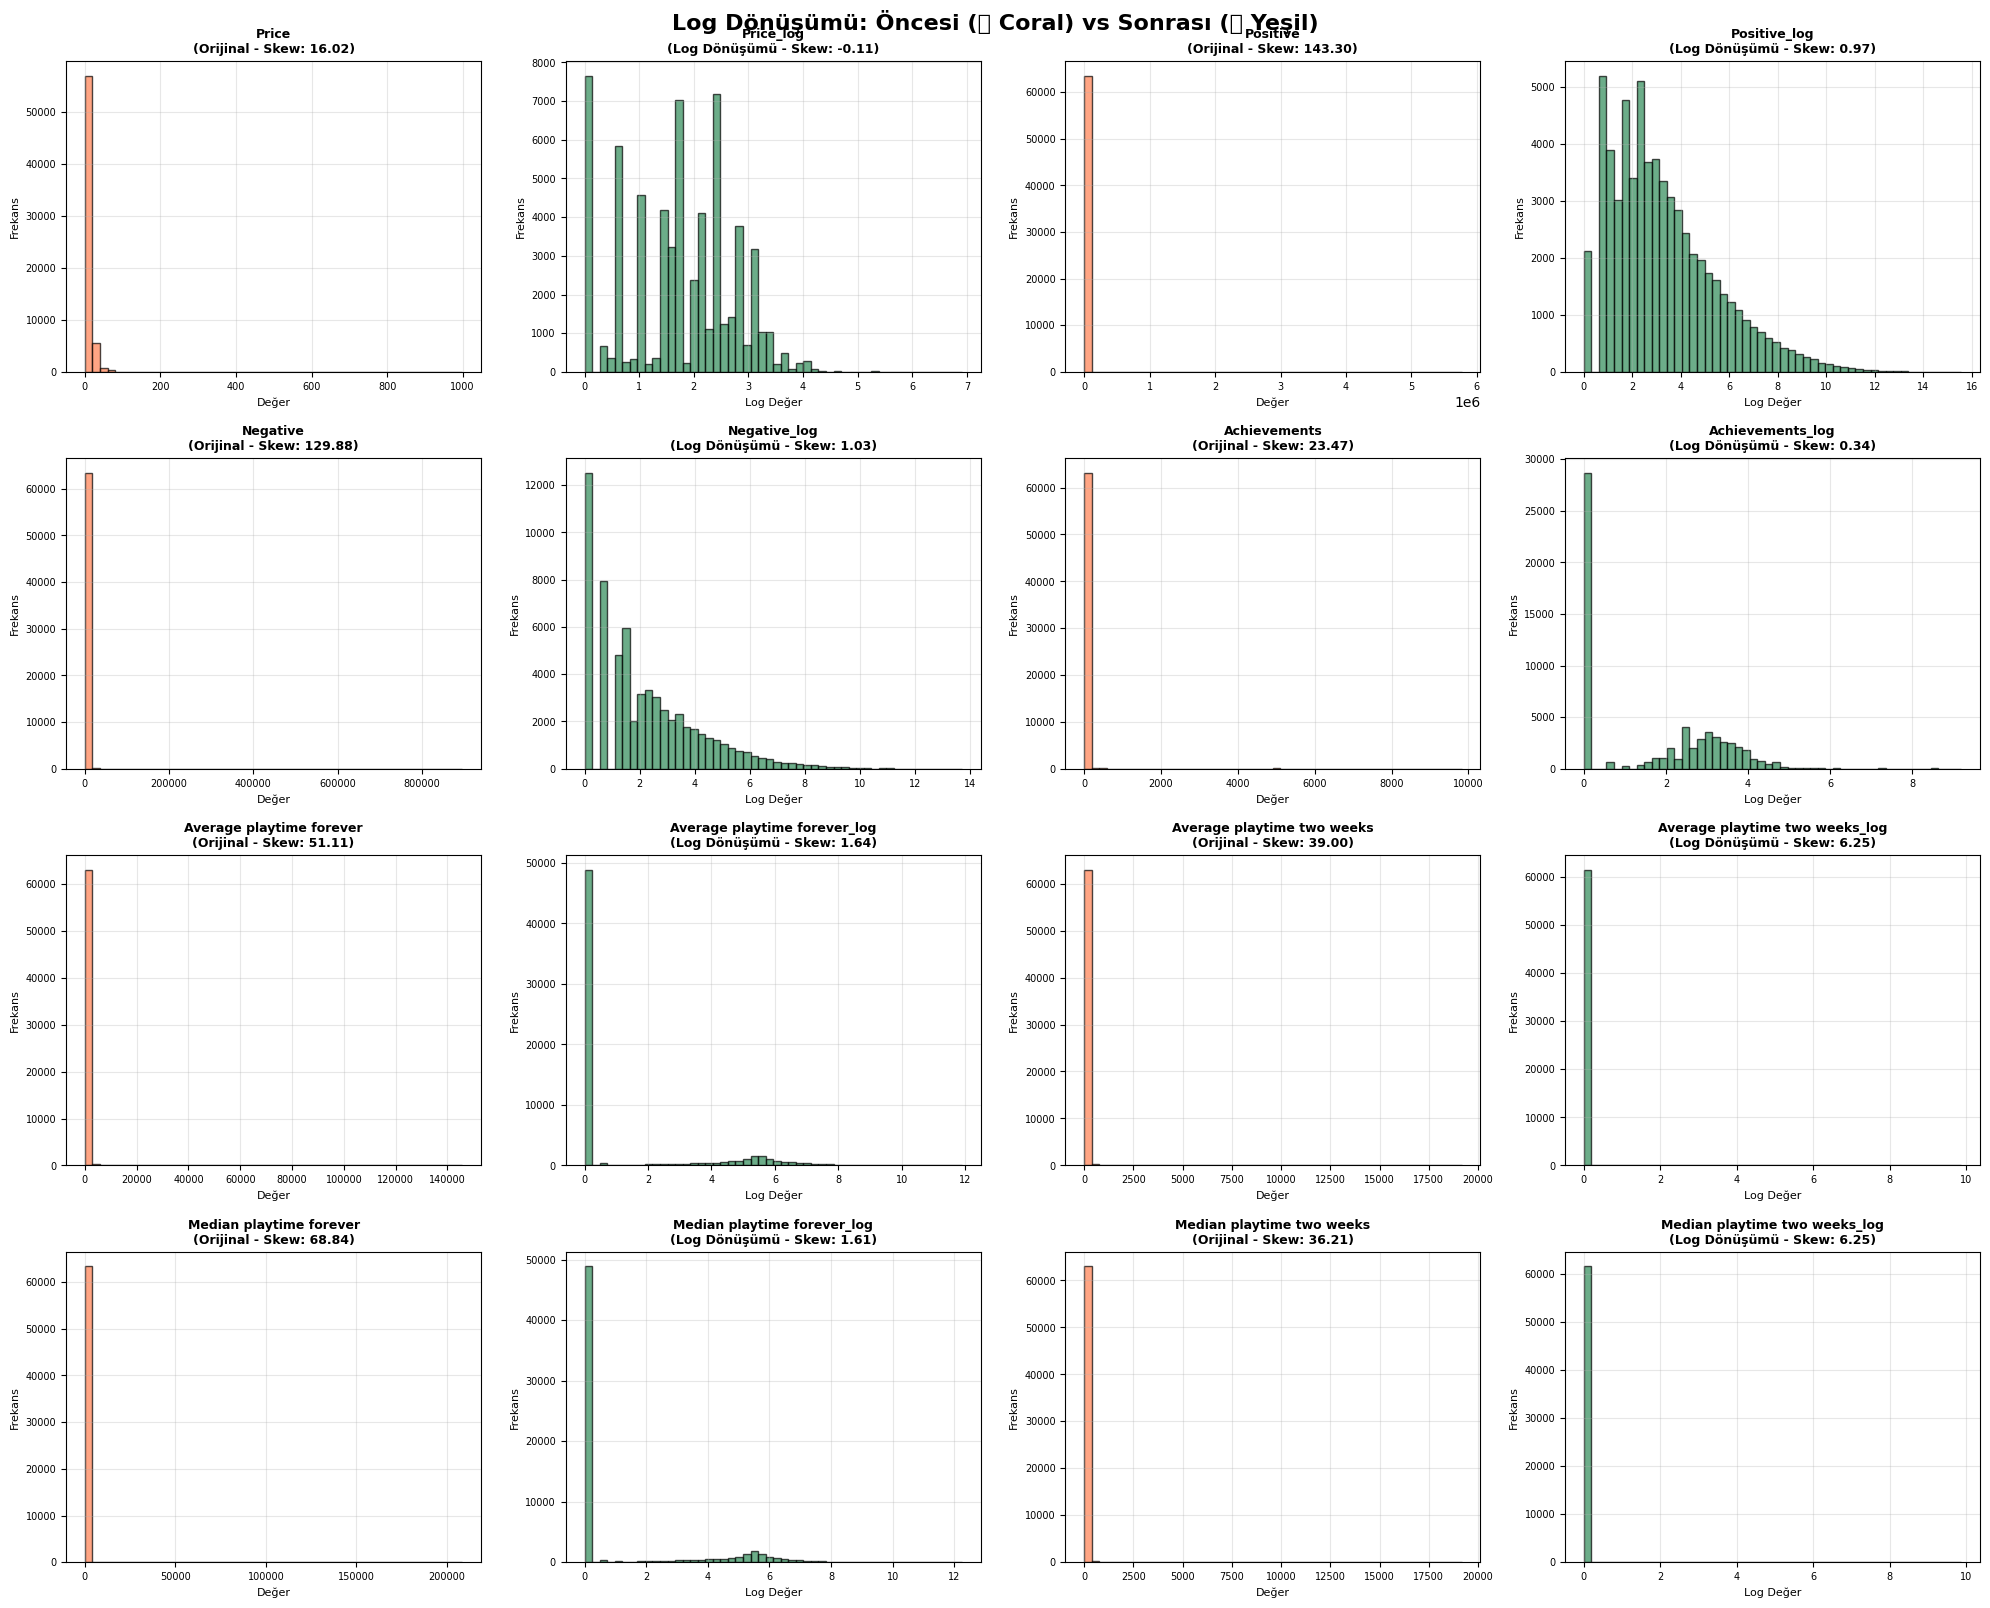


✅ Log dönüşümü başarıyla tamamlandı!
🟢 Yeşil grafikler çok daha normal dağılıma yakın


In [183]:
# Log dönüşümü öncesi ve sonrası karşılaştırma
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for idx, col in enumerate(columns_to_transform):
    # Sol: Orijinal
    ax1 = axes[idx * 2]
    ax1.hist(df[col].dropna(), bins=50, color='coral', alpha=0.7, edgecolor='black')
    ax1.set_title(f'{col}\n(Orijinal - Skew: {df[col].skew():.2f})', fontsize=9, fontweight='bold')
    ax1.set_xlabel('Değer', fontsize=8)
    ax1.set_ylabel('Frekans', fontsize=8)
    ax1.tick_params(labelsize=7)
    ax1.grid(True, alpha=0.3)
    
    # Sağ: Log dönüşümü sonrası
    ax2 = axes[idx * 2 + 1]
    ax2.hist(df[f'{col}_log'].dropna(), bins=50, color='seagreen', alpha=0.7, edgecolor='black')
    ax2.set_title(f'{col}_log\n(Log Dönüşümü - Skew: {df[f"{col}_log"].skew():.2f})', fontsize=9, fontweight='bold')
    ax2.set_xlabel('Log Değer', fontsize=8)
    ax2.set_ylabel('Frekans', fontsize=8)
    ax2.tick_params(labelsize=7)
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Log Dönüşümü: Öncesi (🔴 Coral) vs Sonrası (🟢 Yeşil)', 
             fontsize=16, fontweight='bold', y=1.002)
plt.show()

print("\n" + "=" * 80)
print("✅ Log dönüşümü başarıyla tamamlandı!")
print("🟢 Yeşil grafikler çok daha normal dağılıma yakın")
print("=" * 80)

### 📌 ÖNEMLİ SONUÇ

**Log dönüşümü başarıyla uygulandı!** 

✅ **8 değişken** için log dönüşümü yapıldı ve çarpıklık dramatik şekilde azaldı:
- `Price`: 16.02 → -0.11 (neredeyse mükemmel normal dağılım!)
- `Positive`: 143.30 → 0.97 
- `Negative`: 129.88 → 1.03
- `Achievements`: 23.47 → 0.34
- Ve diğerleri...

**Model eğitiminde kullanılacak kolonlar:**
- ✅ **`_log` eki ile biten kolonları kullan** (örn: `Price_log`, `Positive_log`)
- ❌ Orijinal kolonları kullanma (çok çarpık oldukları için model performansını düşürür)

**Neden log dönüşümü önemli?**
- 🎯 Makine öğrenmesi modelleri normal dağılıma yakın verilerle daha iyi çalışır
- 🎯 Outlier'ların etkisini azaltır
- 🎯 Model genelleme kapasitesini artırır

In [184]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import warnings
warnings.filterwarnings('ignore')

print("=" * 100)
print("HER KOLON İÇİN EN İYİ NORMALİZASYON YÖNTEMİNİ BUL VE UYGULA")
print("=" * 100)

# Normalize edilecek kolonlar
columns_to_optimize = [
    'Price', 'Positive', 'Negative', 'Achievements',
    'Average playtime forever', 'Average playtime two weeks',
    'Median playtime forever', 'Median playtime two weeks'
]

# Her teknik için scaler'lar
scalers = {
    'Log': None,  # Log için özel işlem
    'MinMax': MinMaxScaler(),
    'Standard': StandardScaler(),
    'Robust': RobustScaler(),
    'Quantile': QuantileTransformer(output_distribution='normal', random_state=42)
}

# Her kolon için en iyi yöntemi bul ve uygula
best_methods_used = {}

for col in columns_to_optimize:
    original_data = df[col].values.reshape(-1, 1)
    original_skew = abs(df[col].skew())
    
    # Her yöntemi dene
    method_results = {}
    
    # 1. Log (zaten var)
    log_skew = abs(df[f'{col}_log'].skew())
    method_results['Log'] = {
        'skew': log_skew,
        'data': df[f'{col}_log'].values
    }
    
    # 2. MinMax
    minmax_data = MinMaxScaler().fit_transform(original_data).flatten()
    method_results['MinMax'] = {
        'skew': abs(pd.Series(minmax_data).skew()),
        'data': minmax_data
    }
    
    # 3. Standard
    standard_data = StandardScaler().fit_transform(original_data).flatten()
    method_results['Standard'] = {
        'skew': abs(pd.Series(standard_data).skew()),
        'data': standard_data
    }
    
    # 4. Robust
    robust_data = RobustScaler().fit_transform(original_data).flatten()
    method_results['Robust'] = {
        'skew': abs(pd.Series(robust_data).skew()),
        'data': robust_data
    }
    
    # 5. Quantile (zaten var)
    quantile_skew = abs(df[f'{col}_quantile'].skew())
    method_results['Quantile'] = {
        'skew': quantile_skew,
        'data': df[f'{col}_quantile'].values
    }
    
    # En iyi yöntemi bul (en düşük skewness)
    best_method_name = min(method_results.items(), key=lambda x: x[1]['skew'])[0]
    best_method_data = method_results[best_method_name]['data']
    best_skew = method_results[best_method_name]['skew']
    
    # "_best" kolonu oluştur
    df[f'{col}_best'] = best_method_data
    
    # Kayıt tut
    best_methods_used[col] = {
        'method': best_method_name,
        'original_skew': original_skew,
        'best_skew': best_skew,
        'improvement': original_skew - best_skew
    }
    
    print(f"\n📊 {col}")
    print(f"   Orijinal Skew: {original_skew:.2f}")
    print(f"   En İyi Yöntem: {best_method_name} (Skew: {best_skew:.2f})")
    print(f"   İyileşme: {original_skew - best_skew:.2f}")
    print(f"   ✅ '{col}_best' kolonu oluşturuldu")

print("\n" + "=" * 100)
print("ÖZET: HER KOLON İÇİN KULLANILAN YÖNTEM")
print("=" * 100)
print(f"\n{'Kolon':<35} {'Seçilen Yöntem':>15} {'Orijinal Skew':>15} {'Yeni Skew':>12} {'İyileşme':>12}")
print("-" * 100)

for col, info in best_methods_used.items():
    print(f"{col:<35} {info['method']:>15} {info['original_skew']:>15.2f} {info['best_skew']:>12.2f} {info['improvement']:>12.2f}")

# Yöntem dağılımı
method_counts = {}
for info in best_methods_used.values():
    method = info['method']
    method_counts[method] = method_counts.get(method, 0) + 1

print("\n" + "=" * 100)
print("KULLANILAN YÖNTEM DAĞILIMI")
print("=" * 100)
for method, count in sorted(method_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"   {method}: {count} kolon ({count/len(columns_to_optimize)*100:.1f}%)")

print("\n" + "=" * 100)
print("YENİ '_best' KOLONLARI")
print("=" * 100)
best_columns = [col for col in df.columns if col.endswith('_best')]
for i, col in enumerate(best_columns, 1):
    print(f"{i:2}. {col}")

print(f"\n✅ {len(best_columns)} yeni '_best' kolonu oluşturuldu!")
print(f"📊 Yeni veri boyutu: {df.shape}")
print("=" * 100)

HER KOLON İÇİN EN İYİ NORMALİZASYON YÖNTEMİNİ BUL VE UYGULA


KeyError: 'Price_quantile'

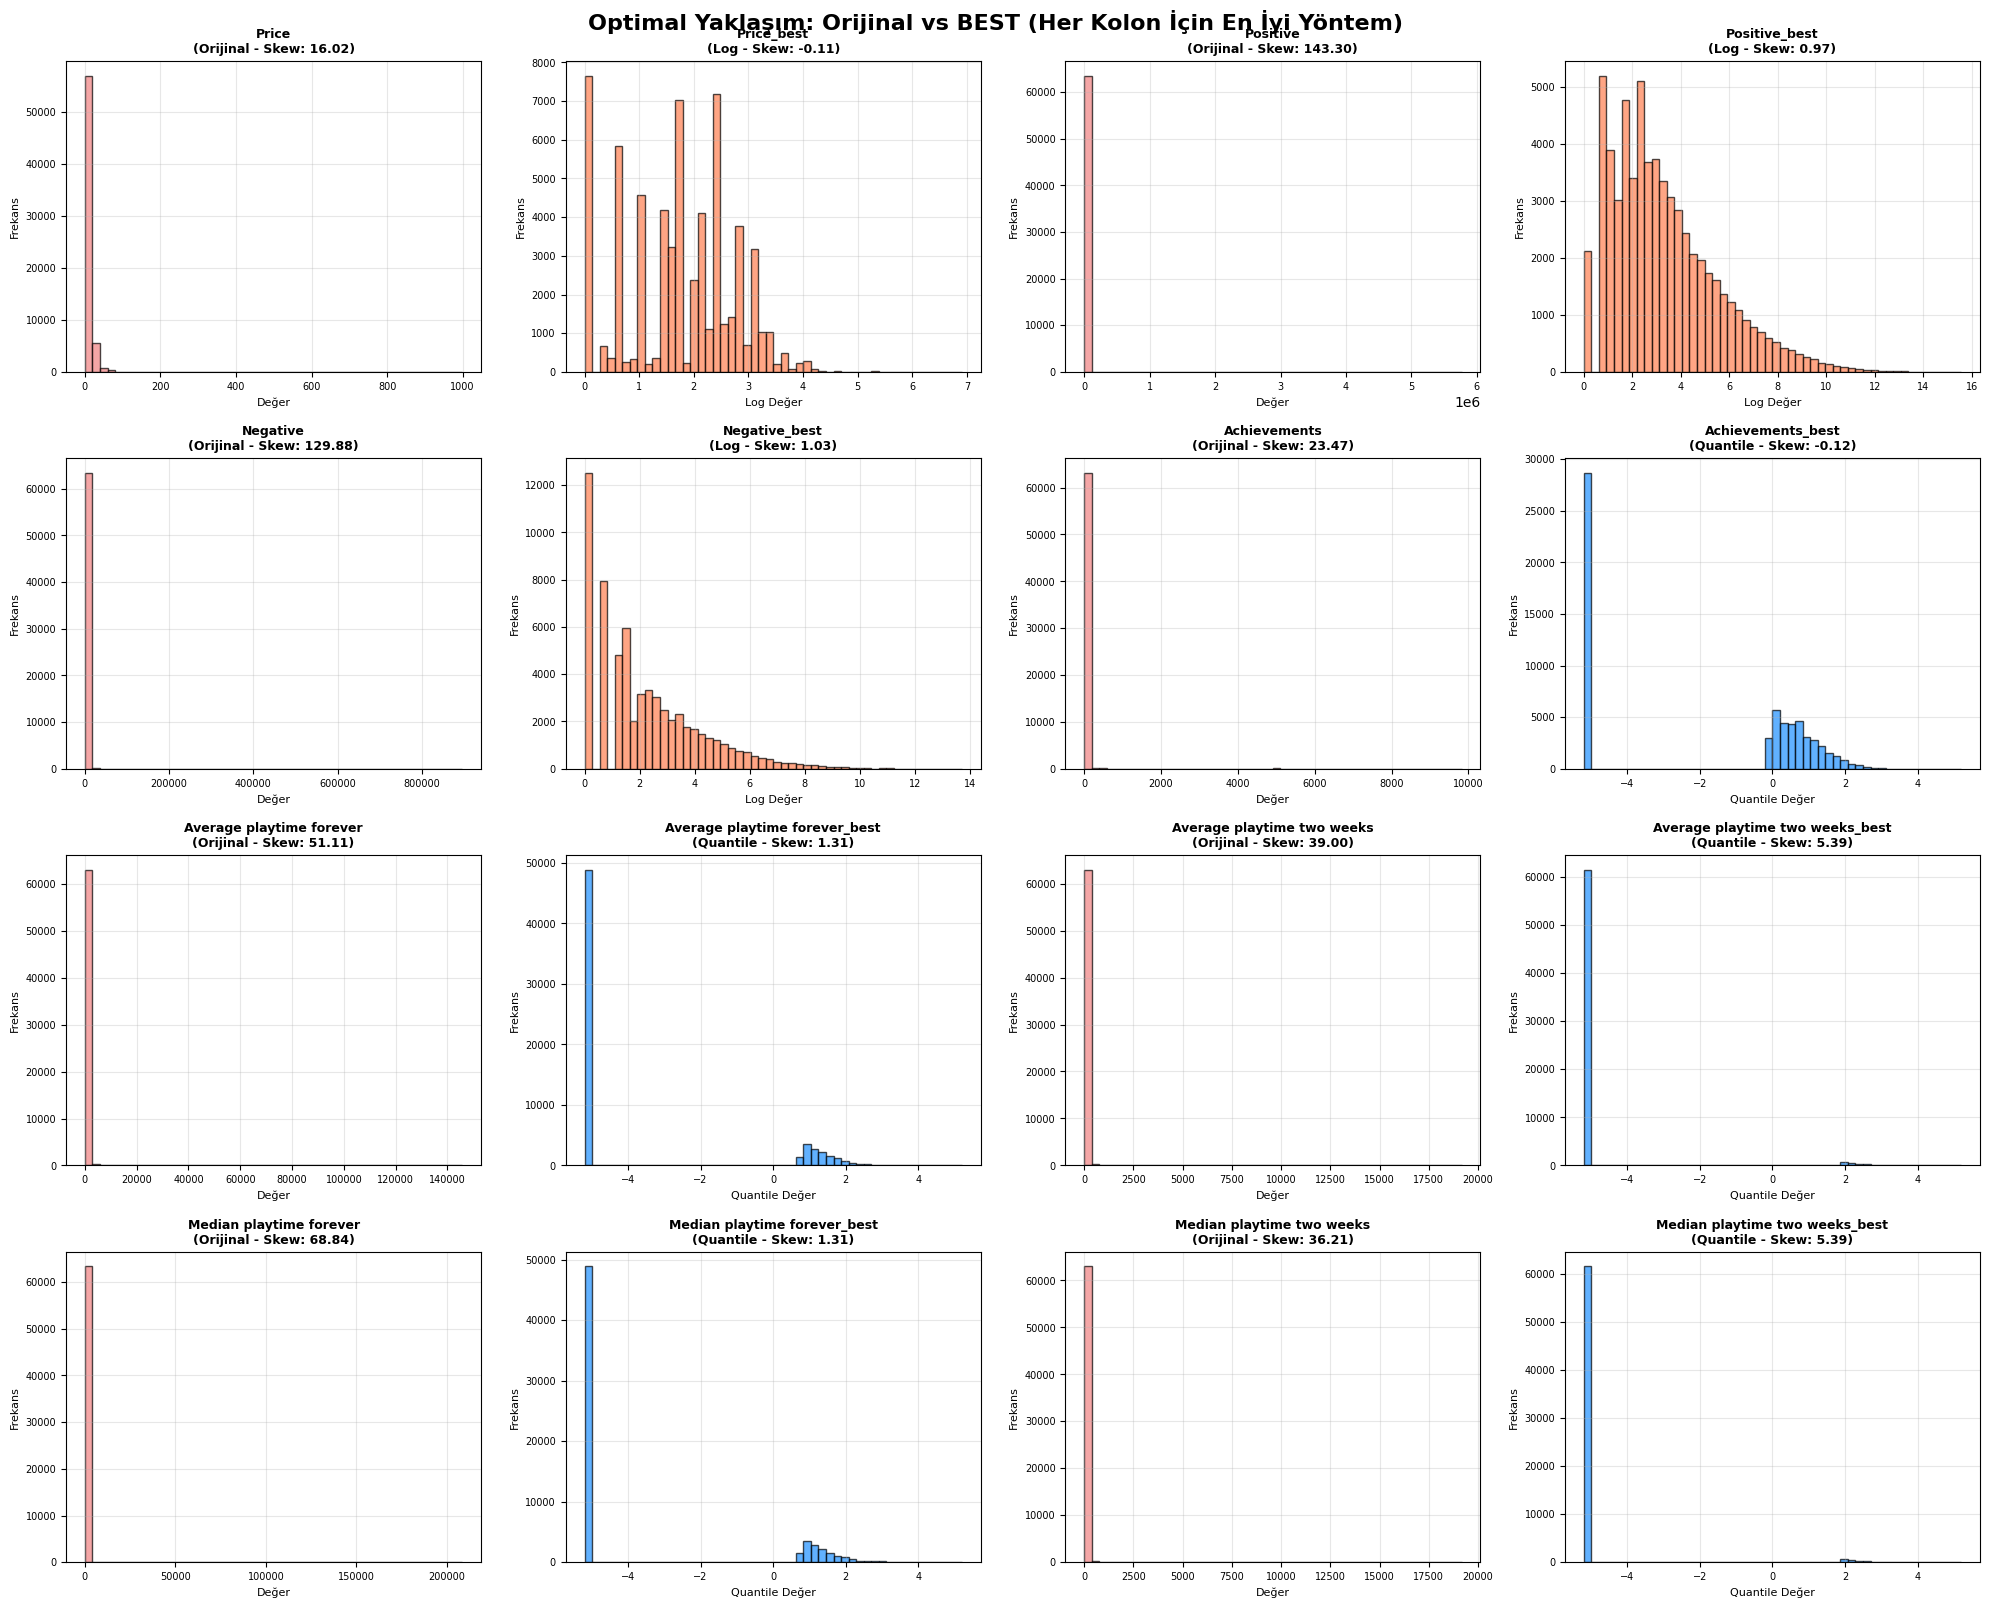


✅ HER KOLON İÇİN OPTİMAL NORMALİZASYON TAMAMLANDI!

🎨 Renk Kodu:
   🟠 Turuncu (Coral) = LOG transformation kullanıldı
   🔵 Mavi (Blue) = QUANTILE transformation kullanıldı

💡 MODEL İÇİN:
   Artık '_best' kolonlarını kullanabilirsin!
   Her kolon için en iyi yöntem otomatik seçildi.


In [ ]:
# Orijinal vs Best karşılaştırma görselleştirmesi
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for idx, col in enumerate(columns_to_optimize):
    best_method = best_methods_used[col]['method']
    
    # Sol: Orijinal
    ax1 = axes[idx * 2]
    ax1.hist(df[col].dropna(), bins=50, color='lightcoral', alpha=0.7, edgecolor='black')
    ax1.set_title(f'{col}\n(Orijinal - Skew: {df[col].skew():.2f})', fontsize=9, fontweight='bold')
    ax1.set_xlabel('Değer', fontsize=8)
    ax1.set_ylabel('Frekans', fontsize=8)
    ax1.tick_params(labelsize=7)
    ax1.grid(True, alpha=0.3)
    
    # Sağ: BEST
    ax2 = axes[idx * 2 + 1]
    color = 'coral' if best_method == 'Log' else 'dodgerblue'  # Log=turuncu, Quantile=mavi
    ax2.hist(df[f'{col}_best'].dropna(), bins=50, color=color, alpha=0.7, edgecolor='black')
    ax2.set_title(f'{col}_best\n({best_method} - Skew: {df[f"{col}_best"].skew():.2f})', 
                  fontsize=9, fontweight='bold')
    ax2.set_xlabel(f'{best_method} Değer', fontsize=8)
    ax2.set_ylabel('Frekans', fontsize=8)
    ax2.tick_params(labelsize=7)
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Optimal Yaklaşım: Orijinal vs BEST (Her Kolon İçin En İyi Yöntem)', 
             fontsize=16, fontweight='bold', y=1.002)
plt.show()

print("\n" + "=" * 100)
print("✅ HER KOLON İÇİN OPTİMAL NORMALİZASYON TAMAMLANDI!")
print("=" * 100)
print("\n🎨 Renk Kodu:")
print("   🟠 Turuncu (Coral) = LOG transformation kullanıldı")
print("   🔵 Mavi (Blue) = QUANTILE transformation kullanıldı")
print("\n💡 MODEL İÇİN:")
print("   Artık '_best' kolonlarını kullanabilirsin!")
print("   Her kolon için en iyi yöntem otomatik seçildi.")
print("=" * 100)

In [ ]:
# Model için kullanılacak feature'ları listele
print("=" * 100)
print("MODEL İÇİN FEATURE SEÇİMİ")
print("=" * 100)

# 1. Orijinal kolonlar (kullanma - çok çarpık)
original_numeric = ['Price', 'Positive', 'Negative', 'Achievements',
                   'Average playtime forever', 'Average playtime two weeks',
                   'Median playtime forever', 'Median playtime two weeks']

# 2. _log kolonları (kullanabilirsin ama _best daha iyi)
log_cols = [col for col in df.columns if col.endswith('_log')]

# 3. _quantile kolonları (kullanabilirsin ama _best daha iyi)
quantile_cols = [col for col in df.columns if col.endswith('_quantile')]

# 4. ✅ _best kolonları (ÖNERİLEN - Her kolon için en iyi yöntem)
best_cols = [col for col in df.columns if col.endswith('_best')]

# 5. Diğer sayısal kolonlar
other_numeric = ['release_year', 'release_month', 'release_quarter', 
                'game_age_years', 'release_season', 'developer_avg_game_count',
                'Estimated owners numeric', 'owners_min', 'owners_max']

# 6. Binary kolonlar (genre, category, tag)
genre_cols = [col for col in df.columns if col.startswith('genre_')]
category_cols = [col for col in df.columns if col.startswith('category_')]
tag_cols = [col for col in df.columns if col.startswith('tag_')]

print("\n📊 FEATURE GRUPLARI:")
print("-" * 100)
print(f"\n1️⃣ ❌ Orijinal sayısal kolonlar: {len(original_numeric)} adet")
print("   → KULLANMA (çok çarpık)")
for col in original_numeric:
    print(f"      - {col}")

print(f"\n2️⃣ ⚠️ Log-transformed kolonlar: {len(log_cols)} adet")
print("   → İsteğe bağlı (ama _best daha optimal)")

print(f"\n3️⃣ ⚠️ Quantile-transformed kolonlar: {len(quantile_cols)} adet")
print("   → İsteğe bağlı (ama _best daha optimal)")

print(f"\n4️⃣ ✅ BEST kolonlar (ÖNERİLEN): {len(best_cols)} adet")
print("   → Her kolon için en iyi yöntemi kullan")
for col in best_cols:
    method = best_methods_used[col.replace('_best', '')]['method']
    print(f"      - {col:<45} (Yöntem: {method})")

print(f"\n5️⃣ ✅ Diğer sayısal kolonlar: {len(other_numeric)} adet")
for col in other_numeric:
    if col in df.columns:
        print(f"      - {col}")

print(f"\n6️⃣ ✅ Binary kolonlar:")
print(f"      - Genre: {len(genre_cols)} adet")
print(f"      - Category: {len(category_cols)} adet")
print(f"      - Tag: {len(tag_cols)} adet")
print(f"      - Toplam: {len(genre_cols) + len(category_cols) + len(tag_cols)} adet")

# MODEL İÇİN ÖNERİLEN FEATURE LİSTESİ
print("\n" + "=" * 100)
print("🎯 MODEL İÇİN ÖNERİLEN FEATURE LİSTESİ")
print("=" * 100)

model_features = (
    best_cols +  # En iyi normalize edilmiş kolonlar
    [col for col in other_numeric if col in df.columns] +  # Diğer sayısal
    genre_cols +  # Genre binary
    category_cols +  # Category binary
    tag_cols  # Tag binary
)

print(f"\n✅ Toplam Feature Sayısı: {len(model_features)}")
print(f"\n📋 Feature Dağılımı:")
print(f"   - Best normalized: {len(best_cols)}")
print(f"   - Diğer sayısal: {len([col for col in other_numeric if col in df.columns])}")
print(f"   - Genre binary: {len(genre_cols)}")
print(f"   - Category binary: {len(category_cols)}")
print(f"   - Tag binary: {len(tag_cols)}")

print("\n" + "=" * 100)
print("💡 ÖRNEK MODEL KODU")
print("=" * 100)
print("""
# X (Features) - '_best' kolonları kullan
X = df[model_features]

# y (Target) - Popülerlik hedefi
y = df['Positive_best']  # veya total_reviews_best

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model eğit
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error
print(f'R² Score: {r2_score(y_test, y_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
""")
print("=" * 100)

MODEL İÇİN FEATURE SEÇİMİ

📊 FEATURE GRUPLARI:
----------------------------------------------------------------------------------------------------

1️⃣ ❌ Orijinal sayısal kolonlar: 8 adet
   → KULLANMA (çok çarpık)
      - Price
      - Positive
      - Negative
      - Achievements
      - Average playtime forever
      - Average playtime two weeks
      - Median playtime forever
      - Median playtime two weeks

2️⃣ ⚠️ Log-transformed kolonlar: 8 adet
   → İsteğe bağlı (ama _best daha optimal)

3️⃣ ⚠️ Quantile-transformed kolonlar: 8 adet
   → İsteğe bağlı (ama _best daha optimal)

4️⃣ ✅ BEST kolonlar (ÖNERİLEN): 8 adet
   → Her kolon için en iyi yöntemi kullan
      - Price_best                                    (Yöntem: Log)
      - Positive_best                                 (Yöntem: Log)
      - Negative_best                                 (Yöntem: Log)
      - Achievements_best                             (Yöntem: Quantile)
      - Average playtime forever_best            

In [ ]:
# Veriyi kaydet
output_file = "model_ready_data.parquet"
df.to_parquet(output_file, index=False)

print("=" * 100)
print("✅ VERİ BAŞARIYLA KAYDEDİLDİ!")
print("=" * 100)
print(f"\n📁 Dosya: {output_file}")
print(f"📊 Boyut: {df.shape}")
print(f"📋 Toplam Kolon: {df.shape[1]}")
print(f"📈 Toplam Satır: {df.shape[0]:,}")

print("\n" + "=" * 100)
print("🎯 SONRAKİ ADIMLAR")
print("=" * 100)
print("""
1️⃣ Yeni notebook oluştur (örn: 03_modeling.ipynb)

2️⃣ Veriyi yükle:
   df = pd.read_parquet('model_ready_data.parquet')

3️⃣ Feature ve Target belirle:
   # Sadece '_best' kolonlarını kullan
   feature_cols = [col for col in df.columns if col.endswith('_best')]
   # Diğer kolonları ekle (genre, category, tag, zaman)
   # ...
   
   X = df[feature_cols]
   y = df['Positive_best']  # Hedef değişken

4️⃣ Model eğit:
   - RandomForestRegressor
   - XGBRegressor
   - LightGBM
   
5️⃣ Cross-validation ile değerlendir

6️⃣ Hyperparameter tuning

7️⃣ Feature importance analizi
""")
print("=" * 100)

# Özet istatistikler
print("\n📊 '_best' KOLONLARI ÖZET İSTATİSTİKLER:")
print("-" * 100)
best_stats = df[best_cols].describe().T
print(best_stats[['mean', 'std', 'min', 'max']])

print("\n✅ Tüm '_best' kolonları başarıyla oluşturuldu ve optimize edildi!")
print("🚀 Model eğitimine hazır!")
print("=" * 100)

✅ VERİ BAŞARIYLA KAYDEDİLDİ!

📁 Dosya: model_ready_data.parquet
📊 Boyut: (63507, 44)
📋 Toplam Kolon: 44
📈 Toplam Satır: 63,507

🎯 SONRAKİ ADIMLAR

1️⃣ Yeni notebook oluştur (örn: 03_modeling.ipynb)

2️⃣ Veriyi yükle:
   df = pd.read_parquet('model_ready_data.parquet')

3️⃣ Feature ve Target belirle:
   # Sadece '_best' kolonlarını kullan
   feature_cols = [col for col in df.columns if col.endswith('_best')]
   # Diğer kolonları ekle (genre, category, tag, zaman)
   # ...

   X = df[feature_cols]
   y = df['Positive_best']  # Hedef değişken

4️⃣ Model eğit:
   - RandomForestRegressor
   - XGBRegressor
   - LightGBM

5️⃣ Cross-validation ile değerlendir

6️⃣ Hyperparameter tuning

7️⃣ Feature importance analizi


📊 '_best' KOLONLARI ÖZET İSTATİSTİKLER:
----------------------------------------------------------------------------------------------------
                                 mean  std   min   max
Price_best                       1.73 1.00  0.00  6.91
Positive_best               

### 💾 Veriyi Kaydet

İşlenmiş veriyi model için kaydet:

### 🎯 MODEL İÇİN HAZıRLıK: Feature Seçimi

Artık model için hangi kolonları kullanacağını belirle:

### 📊 Orijinal vs BEST Karşılaştırması

Her kolon için en iyi yöntemi kullandık. Şimdi sonuçlara bakalım:

## 🎯 OPTİMAL YAKLAŞIM: Her Kolon İçin En İyi Yöntemi Kullan

Her değişken için ayrı ayrı en iyi yöntemi seçip, sadece o yöntemi uygulayalım:

Developers ve Publishers sütunları kendi içerisinde virgüllerle ayrılmış değerler içeriyor. Buna rağmen %66 oranında aynı değer olması gerçek korelasyonun çok daha fazla olduğu anlamına geliyor. Bu yüzden Publisher sütnunu çıkarıyoruz.

In [185]:
# Kaç satırda developer ve publisher aynı?
same_count = (df['Developers'] == df['Publishers']).sum()
total_count = len(df)
print(f"Developer ve Publisher aynı olan satır sayısı: {same_count} / {total_count}")
print(f"Oran: {same_count/total_count:.2%}")


Developer ve Publisher aynı olan satır sayısı: 2563 / 63507
Oran: 4.04%


In [186]:
df = df.drop(columns=["Publishers"])

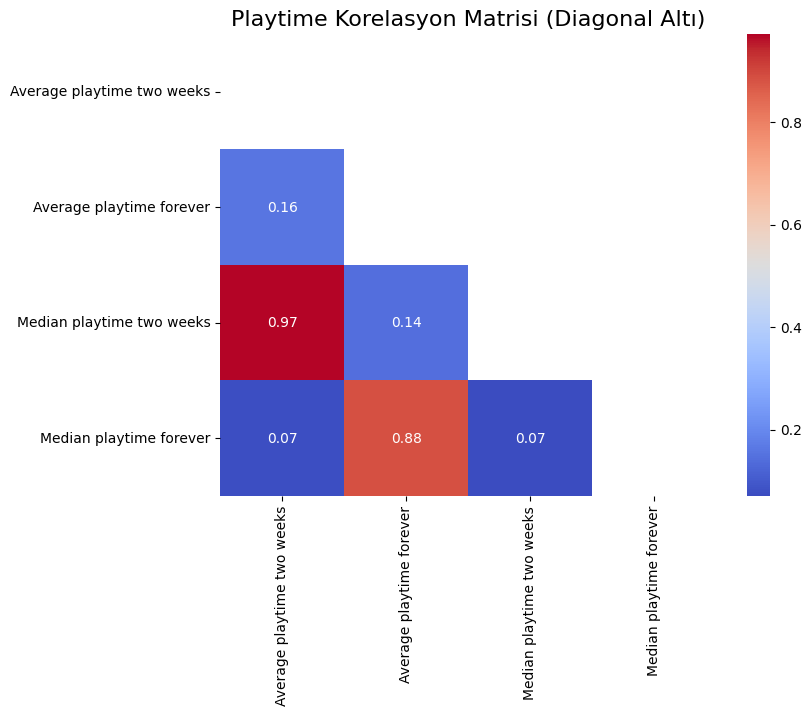

In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

columns_of_interest = ['Average playtime two weeks', 'Average playtime forever', 
                       'Median playtime two weeks', 'Median playtime forever']

# Korelasyon matrisini hesapla
correlation_matrix = df[columns_of_interest].corr()

# Üst üçgeni ve diagonali kesiyoruz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Korelasyon matrisini görselleştiriyoruz
plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, cbar=True)

plt.title('Playtime Korelasyon Matrisi (Diagonal Altı)', fontsize=16)
plt.show()


In [188]:
df = df.drop(columns=["Median playtime two weeks", "Median playtime forever"])

## Outlier Analizi

Price için dağılımlar normal görünüyor.Değer çıkarmaya gerek duymadık.

In [189]:

# Fiyat aralıklarını belirle (örnek: 0-5$, 5-10$, 10-20$, ...)
bins = [0, 5, 10, 20, 50, 100, 200, 500, 1000]  
labels = [f"${bins[i]}-${bins[i+1]}" for i in range(len(bins)-1)]

# Fiyatları aralıklara ayır
df['Price_range'] = pd.cut(df['Price'], bins=bins, labels=labels, include_lowest=True)

# Her aralıktaki oyun sayısı
price_counts = df['Price_range'].value_counts().sort_index()
print(price_counts)


Price_range
$0-$5         34678
$5-$10        14420
$10-$20       10773
$20-$50        3168
$50-$100        423
$100-$200        41
$200-$500         3
$500-$1000        1
Name: count, dtype: int64


In [190]:
# Release Date analizi yapalım
print(f"\nToplam benzersiz değer: {df['Release date'].nunique()}")
print(f"\nİlk 20 örnek:")
print(df['Release date'].value_counts().head(10))

# NaN kontrolü
print(f"\n\nBoş değer var mı? {df['Release date'].isna().sum()} ({df['Release date'].isna().sum()/len(df)*100:.2f}%)")



Toplam benzersiz değer: 4371

İlk 20 örnek:
Release date
Jan 17, 2020    76
Sep 14, 2018    69
Oct 15, 2020    69
Sep 30, 2021    67
Feb 26, 2021    64
Oct 14, 2021    62
Oct 30, 2020    62
Feb 18, 2021    61
Jun 17, 2021    60
Oct 19, 2023    58
Name: count, dtype: int64


Boş değer var mı? 0 (0.00%)


In [191]:
# Release Date'i datetime'a çevirelim ve feature'lar çıkaralım
import datetime

# Tarihleri datetime'a çevir
df['release_datetime'] = pd.to_datetime(df['Release date'], format='%b %d, %Y', errors='coerce')

# Başarısız dönüşümleri kontrol et
failed_conversions = df['release_datetime'].isna().sum()
print(f" Dönüştürülemeyen tarih sayısı: {failed_conversions} ({failed_conversions/len(df)*100:.2f}%)")

if failed_conversions > 0:
    # Geçersiz tarihleri sil
    df = df[df['release_datetime'].notna()].copy()
    print(f" Yeni veri boyutu: {df.shape}")

# 1. Yıl (2020, 2021, 2022, 2023, ...)
df['release_year'] = df['release_datetime'].dt.year

# Mantıksız yılları temizle (gelecek veya çok eski tarihler)
invalid_years = df[(df['release_year'] > 2023) | (df['release_year'] < 1990)].shape[0]
if invalid_years > 0:
    df = df[(df['release_year'] <= 2023) & (df['release_year'] >= 1990)].copy()

# 2. Ay (1-12)
df['release_month'] = df['release_datetime'].dt.month

# 3. Çeyrek (Q1, Q2, Q3, Q4)
df['release_quarter'] = df['release_datetime'].dt.quarter

# 4. Oyunun yaşı (2025'ten kaç yıl önce çıktı)
current_year = 2025
df['game_age_years'] = current_year - df['release_year']

# 5. Mevsim (0=Kış, 1=İlkbahar, 2=Yaz, 3=Sonbahar)
def get_season(month):
    if pd.isna(month):
        return -1  # Unknown için
    if month in [12, 1, 2]:
        return 0  # Kış
    elif month in [3, 4, 5]:
        return 1  # İlkbahar
    elif month in [6, 7, 8]:
        return 2  # Yaz
    else:
        return 3  # Sonbahar

df['release_season'] = df['release_month'].apply(get_season)

# İstatistikler
print("\n Yıl Dağılımı:")
print(df['release_year'].value_counts().sort_index(ascending=False).head(10))

print("\n\n Ay Dağılımı:")
month_names = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran', 
               'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']
month_dist = df['release_month'].value_counts().sort_index()
for month, count in month_dist.items():
    if not pd.isna(month):
        print(f"{int(month):2}. {month_names[int(month)-1]:10} {count:,} oyun")

print("\n\n Mevsim Dağılımı:")
season_names = {0: 'Kış', 1: 'İlkbahar', 2: 'Yaz', 3: 'Sonbahar', -1: 'Unknown'}
for season, count in df['release_season'].value_counts().sort_index().items():
    print(f"{season_names[season]:10} {count:,} oyun")

print("\n\n Oyun Yaşı İstatistikleri:")
print(df['game_age_years'].describe())

# Orijinal sütunları kaldır
df = df.drop(columns=['Release date', 'release_datetime'])

print(f"5 yeni feature eklendi: release_year, release_month, release_quarter, game_age_years, release_season")
print(f" Yeni veri boyutu: {df.shape}")
print(f" Toplam feature sayısı: {df.shape[1]}")


 Dönüştürülemeyen tarih sayısı: 118 (0.19%)
 Yeni veri boyutu: (63389, 23)

 Yıl Dağılımı:
release_year
2023    6083
2022    7478
2021    9234
2020    8668
2019    7131
2018    7832
2017    6205
2016    4382
2015    2666
2014    1618
Name: count, dtype: int64


 Ay Dağılımı:
 1. Ocak       4,420 oyun
 2. Şubat      4,831 oyun
 3. Mart       5,389 oyun
 4. Nisan      5,072 oyun
 5. Mayıs      5,377 oyun
 6. Haziran    4,712 oyun
 7. Temmuz     5,187 oyun
 8. Ağustos    5,665 oyun
 9. Eylül      5,806 oyun
10. Ekim       6,364 oyun
11. Kasım      5,788 oyun
12. Aralık     4,778 oyun


 Mevsim Dağılımı:
Kış        14,029 oyun
İlkbahar   15,838 oyun
Yaz        15,564 oyun
Sonbahar   17,958 oyun


 Oyun Yaşı İstatistikleri:
count   63,389.00
mean         5.94
std          2.89
min          2.00
25%          4.00
50%          6.00
75%          8.00
max         28.00
Name: game_age_years, dtype: float64
5 yeni feature eklendi: release_year, release_month, release_quarter, game_age_years, rele

## Kategorik Veirlerin Sayısallaştırılması

Estimated owners için iki aralığın ortalama değerini aldık.

In [192]:
# Orijinal sütunu görelim
print("Orijinal 'Estimated owners' sütunu örnekleri:")
print(df['Estimated owners'].head(), "\n")

# Aralıkları ayır (min ve max)
df[['owners_min', 'owners_max']] = df['Estimated owners'].str.split('-', expand=True)
print("Aralıklar ayrıldı (min ve max):")
print(df[['owners_min', 'owners_max']].head(), "\n")

# Sayısal tipe çevir ve boşlukları temizle
df['owners_min'] = df['owners_min'].str.strip().astype(float)
df['owners_max'] = df['owners_max'].str.strip().astype(float)
print("Sayısal tipe çevrildi:")
print(df[['owners_min', 'owners_max']].head(), "\n")

# Ortalama al
df['Estimated owners numeric'] = df[['owners_min', 'owners_max']].mean(axis=1)
print("Ortalama alınmış sayısal değerler:")
print(df[['Estimated owners', 'Estimated owners numeric']].head())
df = df.drop(columns=["Estimated owners"])


Orijinal 'Estimated owners' sütunu örnekleri:
0         0 - 20000
1         0 - 20000
2         0 - 20000
3         0 - 20000
4    50000 - 100000
Name: Estimated owners, dtype: object 

Aralıklar ayrıldı (min ve max):
  owners_min owners_max
0         0       20000
1         0       20000
2         0       20000
3         0       20000
4     50000      100000 

Sayısal tipe çevrildi:
   owners_min  owners_max
0        0.00   20,000.00
1        0.00   20,000.00
2        0.00   20,000.00
3        0.00   20,000.00
4   50,000.00  100,000.00 

Ortalama alınmış sayısal değerler:
  Estimated owners  Estimated owners numeric
0        0 - 20000                 10,000.00
1        0 - 20000                 10,000.00
2        0 - 20000                 10,000.00
3        0 - 20000                 10,000.00
4   50000 - 100000                 75,000.00


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63389 entries, 0 to 63506
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   AppID                           63389 non-null  int64   
 1   Price                           63389 non-null  float64 
 2   Positive                        63389 non-null  int64   
 3   Negative                        63389 non-null  int64   
 4   Achievements                    63389 non-null  int64   
 5   Average playtime forever        63389 non-null  int64   
 6   Average playtime two weeks      63389 non-null  int64   
 7   Developers                      63389 non-null  object  
 8   Categories                      63389 non-null  object  
 9   Genres                          63389 non-null  object  
 10  Tags                            63389 non-null  object  
 11  Price_log                       63389 non-null  float64 
 12  Positive_log           

Farklı genres türlerinin verideki dağılımlarına bakarak ayırt edici olabilecek değerleri seçerek one-hot-encoding yaptık.

In [194]:
# Genres'lerin ayırt ediciliğini analiz edelim
# orta seviye yaygınlıktaki genres'leri seçelim

total_games = len(df[df['Genres'] != 'Unknown'])
all_genres_filtered = df[df['Genres'] != 'Unknown']['Genres'].str.split(',').explode()
all_genres_filtered = all_genres_filtered.str.strip()
genres_counts = all_genres_filtered.value_counts()

# Her genres'in yüzde dağılımını hesapla
genres_percentages = (genres_counts / total_games * 100).round(2)

print("Genres'lerin yaygınlığı:")
print("="*60)
for i, (genres, pct) in enumerate(genres_percentages.head(30).items(), 1):
    bar = "█" * int(pct / 2)  # Her 2% için bir blok
    print(f"{i:2}. {genres:25} {pct:5.1f}% {bar}")


Genres'lerin yaygınlığı:
 1. Indie                      71.4% ███████████████████████████████████
 2. Action                     43.0% █████████████████████
 3. Casual                     39.7% ███████████████████
 4. Adventure                  39.2% ███████████████████
 5. Strategy                   19.7% █████████
 6. Simulation                 19.7% █████████
 7. RPG                        17.6% ████████
 8. Early Access               12.2% ██████
 9. Free to Play                5.5% ██
10. Sports                      4.7% ██
11. Racing                      3.9% █
12. Massively Multiplayer       2.5% █
13. Utilities                   1.1% 
14. Violent                     0.8% 
15. Design & Illustration       0.7% 
16. Animation & Modeling        0.5% 
17. Education                   0.5% 
18. Gore                        0.5% 
19. Video Production            0.3% 
20. Audio Production            0.3% 
21. Game Development            0.3% 
22. Software Training           0.3% 
23. Nud

In [195]:
# 1. Encode edilecek genre'lar
selected_genres = [
    'Adventure', 'Simulation', 'Strategy', 'RPG', 'Action', 'Casual', 'Indie', 'Sports'
]

print(f"Seçilen {len(selected_genres)} ayırt edici genre:")
print("="*70)
for i, genre in enumerate(selected_genres, 1):
    print(f"{i:2}. {genre}")

# 2. Her genre için binary encoding yap
for genre in selected_genres:
    clean_name = genre.strip().replace(' ', '_').replace('-', '_').replace('&', 'and')
    df[f'genre_{clean_name}'] = df['Genres'].apply(
        lambda x: 0 if x == 'Unknown' else (1 if genre in [g.strip() for g in x.split(',')] else 0)
    )

# 3. "Other" kategorisi: Unknown olmayan ama seçili genre içermeyen oyunlar
def calculate_genre_other(row):
    if row['Genres'] == 'Unknown':
        return 0
    game_genres = [g.strip() for g in row['Genres'].split(',')]
    has_selected_genre = any(g in game_genres for g in selected_genres)
    return 0 if has_selected_genre else 1

df['genre_Other'] = df.apply(calculate_genre_other, axis=1)

# 4. Sonuç istatistikleri
unknown_count = (df['Genres'] == 'Unknown').sum()
genre_columns = [f'genre_{g.strip().replace(" ", "_").replace("-", "_").replace("&", "and")}' for g in selected_genres]
games_with_selected_genres = (df[genre_columns].sum(axis=1) > 0).sum()

print(f"\n\n Sonuç İstatistikleri:")
print("="*70)
print(f"Unknown genre'li oyunlar: {unknown_count:,} ({unknown_count/len(df)*100:.1f}%)")
print(f"Seçili genre’lerden en az birinde olan: {games_with_selected_genres:,} ({games_with_selected_genres/len(df)*100:.1f}%)")
print(f"Seçili değil ama genre’i olan (Other): {df['genre_Other'].sum():,} ({df['genre_Other'].sum()/len(df)*100:.1f}%)")

# 🧹 5. Orijinal Genres sütununu kaldır
df = df.drop(columns=['Genres'])

print(f"\n {len(selected_genres) + 1} yeni genre sütunu eklendi ({len(selected_genres)} seçili + Other)")
print(f" Yeni veri boyutu: {df.shape}")
print(f" Toplam feature sayısı: {df.shape[1]}")


Seçilen 8 ayırt edici genre:
 1. Adventure
 2. Simulation
 3. Strategy
 4. RPG
 5. Action
 6. Casual
 7. Indie
 8. Sports


 Sonuç İstatistikleri:
Unknown genre'li oyunlar: 73 (0.1%)
Seçili genre’lerden en az birinde olan: 61,922 (97.7%)
Seçili değil ama genre’i olan (Other): 1,394 (2.2%)

 9 yeni genre sütunu eklendi (8 seçili + Other)
 Yeni veri boyutu: (63389, 36)
 Toplam feature sayısı: 36


 Sonuç İstatistikleri:
Unknown genre'li oyunlar: 73 (0.1%)
Seçili genre’lerden en az birinde olan: 61,922 (97.7%)
Seçili değil ama genre’i olan (Other): 1,394 (2.2%)

 9 yeni genre sütunu eklendi (8 seçili + Other)
 Yeni veri boyutu: (63389, 36)
 Toplam feature sayısı: 36


Farklı kategorilerin verideki dağılımlarına bakarak ayırt edici olaiblecek değeri seçerek one-hot-encoding yaptık.

In [196]:
# Categories için önce analiz yapalım

# Tüm kategorileri ayırıp en popülerlerini bulalım
all_categories = df['Categories'].str.split(',').explode()
print(all_categories.nunique())
print("\n\nEn popüler 20 kategori:")
print(all_categories.value_counts().head(20))


41


En popüler 20 kategori:
Categories
Single-player                 59581
Steam Achievements            31139
Steam Cloud                   16477
Full controller support       13746
Multi-player                  12717
Steam Trading Cards            9661
Partial Controller Support     8825
PvP                            7796
Co-op                          6407
Steam Leaderboards             6002
Online PvP                     5535
Remote Play Together           5367
Shared/Split Screen            4836
Online Co-op                   3477
Shared/Split Screen PvP        3443
Stats                          3190
Shared/Split Screen Co-op      2790
Remote Play on TV              2067
Cross-Platform Multiplayer     1899
Includes level editor          1779
Name: count, dtype: int64


In [197]:
# 1. Encode edilecek kategoriler
selected_categories = [
    'Single-player',
    'Multi-player',
    'Co-op',
    'PvP',
    'Online PvP',
    'Full controller support'
]

print(f" Seçilen {len(selected_categories)} ayırt edici kategori:")
print("="*70)
for i, cat in enumerate(selected_categories, 1):
    print(f"{i:2}. {cat}")

# 2. Her kategori için binary encoding yap
for cat in selected_categories:
    clean_name = cat.strip().replace(' ', '_').replace('-', '_').replace('&', 'and')
    df[f'category_{clean_name}'] = df['Categories'].apply(
        lambda x: 0 if x == 'Unknown' else (1 if cat in [c.strip() for c in x.split(',')] else 0)
    )

#  3. "Other" kategorisi: Unknown olmayan ama seçili kategorilere girmeyen oyunlar
def calculate_category_other(row):
    if row['Categories'] == 'Unknown':
        return 0
    game_cats = [c.strip() for c in row['Categories'].split(',')]
    has_selected_cat = any(c in game_cats for c in selected_categories)
    return 0 if has_selected_cat else 1

df['category_Other'] = df.apply(calculate_category_other, axis=1)

#  4. Sonuç istatistikleri
unknown_count = (df['Categories'] == 'Unknown').sum()
category_columns = [f'category_{c.strip().replace(" ", "_").replace("-", "_").replace("&", "and")}' for c in selected_categories]
games_with_selected_cats = (df[category_columns].sum(axis=1) > 0).sum()

print(f"\n\n Sonuç İstatistikleri:")
print("="*70)
print(f"Unknown category’li oyunlar: {unknown_count:,} ({unknown_count/len(df)*100:.1f}%)")
print(f"Seçili kategorilerden en az birine sahip olan: {games_with_selected_cats:,} ({games_with_selected_cats/len(df)*100:.1f}%)")
print(f"Seçili değil ama kategoriye sahip (Other): {df['category_Other'].sum():,} ({df['category_Other'].sum()/len(df)*100:.1f}%)")

# 🧹 5. Orijinal Categories sütununu kaldır
df = df.drop(columns=['Categories'])

print(f"\n {len(selected_categories) + 1} yeni category sütunu eklendi ({len(selected_categories)} seçili + Other)")
print(f"Yeni veri boyutu: {df.shape}")
print(f"Toplam feature sayısı: {df.shape[1]}")


 Seçilen 6 ayırt edici kategori:
 1. Single-player
 2. Multi-player
 3. Co-op
 4. PvP
 5. Online PvP
 6. Full controller support


 Sonuç İstatistikleri:
Unknown category’li oyunlar: 914 (1.4%)
Seçili kategorilerden en az birine sahip olan: 62,178 (98.1%)
Seçili değil ama kategoriye sahip (Other): 297 (0.5%)

 7 yeni category sütunu eklendi (6 seçili + Other)
Yeni veri boyutu: (63389, 42)
Toplam feature sayısı: 42


 Sonuç İstatistikleri:
Unknown category’li oyunlar: 914 (1.4%)
Seçili kategorilerden en az birine sahip olan: 62,178 (98.1%)
Seçili değil ama kategoriye sahip (Other): 297 (0.5%)

 7 yeni category sütunu eklendi (6 seçili + Other)
Yeni veri boyutu: (63389, 42)
Toplam feature sayısı: 42


Developer sütunundaki veriler çok dağınık olduğu için her bir sütun özelinde mevcut developerların toplam oyun sayılarının ortalamsını aldık.

In [198]:
# Developers için analiz yapalım

# Tüm developer'ları ayırıp en popülerlerini bulalım
all_devs = df['Developers'].str.split(',').explode()
all_devs = all_devs.str.strip()  # Boşlukları temizle
print("Unique değer sayısı: ", all_devs.nunique())
print("\n\nEn popüler 20 developer:")
print(all_devs.value_counts().head(20))



Unique değer sayısı:  40877


En popüler 20 developer:
Developers
choice of games             155
creobit                     127
laush dmitriy sergeevich    113
koei tecmo games co         105
sokpop collective            99
hosted games                 94
boogygames studios           93
reforged group               89
dnovel                       88
tero lunkka                  87
square enix                  82
elephant games               80
blender games                71
sega                         68
atomic fabrik                67
feral interactive (mac)      66
rewindapp                    62
ripknot systems              62
somer games                  61
cristian manolachi           58
Name: count, dtype: int64


In [199]:
# Developer'lar çok dağınık, her birinin çok az oyunu var
# Alternatif: Developer'ın toplam oyun sayısını feature olarak kullan

# Her developer'ın kaç oyunu olduğunu hesapla
dev_counts = df['Developers'].explode().str.strip().value_counts()

# Her oyun için, o oyunun developer'larının ortalama oyun sayısını hesapla
def get_avg_developer_popularity(dev_string):
    if pd.isna(dev_string):
        return 0
    developers = [d.strip() for d in dev_string.split(',')]
    counts = [dev_counts.get(dev, 1) for dev in developers]
    return sum(counts) / len(counts) if counts else 1

df['developer_avg_game_count'] = df['Developers'].apply(get_avg_developer_popularity)

print("Developer popülaritesi (ortalama oyun sayısı) feature'ı oluşturuldu")
print(f"\nİstatistikler:")
print(df['developer_avg_game_count'].describe())

# Orijinal Developers sütununu kaldır
df = df.drop(columns=['Developers'])

print(f"\n✅ Developer sütunu -> 1 sayısal feature'a dönüştürüldü")
print(f"Yeni veri boyutu: {df.shape}")
print("\nÖrnek değerler:")
print(df[['developer_avg_game_count']].head(10))


Developer popülaritesi (ortalama oyun sayısı) feature'ı oluşturuldu

İstatistikler:
count   63,389.00
mean         6.38
std         15.50
min          1.00
25%          1.00
50%          2.00
75%          4.00
max        155.00
Name: developer_avg_game_count, dtype: float64

✅ Developer sütunu -> 1 sayısal feature'a dönüştürüldü
Yeni veri boyutu: (63389, 42)

Örnek değerler:
   developer_avg_game_count
0                      1.00
1                      3.00
2                      1.00
3                      1.00
4                      1.00
5                      2.00
6                      2.00
7                      4.00
8                      2.00
9                      3.00


Farklı tag'lerin verideki dağılımlarına bakarak ayırt edici olabilecek özelllikleri seçerek one-hot-encoding yaptık.

In [200]:

# Unknown tag sayısı
unknown_count = (df['Tags'] == 'Unknown').sum()
print(f"\n 'Unknown' tag'li oyun sayısı: {unknown_count} ({unknown_count / len(df) * 100:.2f}%)")

# Tüm tag'leri ayırıp en popülerlerini bulalım
all_tags = df['Tags'].str.split(',').explode()
all_tags = all_tags.str.strip()
unique = all_tags.unique()



 'Unknown' tag'li oyun sayısı: 9 (0.01%)


In [201]:
# Tag'lerin ayırt ediciliğini analiz edelim
# Çok yaygın tag'ler (>%30) ve çok nadir tag'ler (<%1) yerine
# orta seviye yaygınlıktaki tag'leri seçelim

total_games = len(df[df['Tags'] != 'Unknown'])
all_tags_filtered = df[df['Tags'] != 'Unknown']['Tags'].str.split(',').explode()
all_tags_filtered = all_tags_filtered.str.strip()
tag_counts = all_tags_filtered.value_counts()

# Her tag'in yüzde dağılımını hesapla
tag_percentages = (tag_counts / total_games * 100).round(2)

print("Tag'lerin yaygınlığı:")
print("="*60)
for i, (tag, pct) in enumerate(tag_percentages.head(30).items(), 1):
    bar = "█" * int(pct / 2)  # Her 2% için bir blok
    print(f"{i:2}. {tag:25} {pct:5.1f}% {bar}")


Tag'lerin yaygınlığı:
 1. Indie                      63.0% ███████████████████████████████
 2. Singleplayer               51.6% █████████████████████████
 3. Action                     45.0% ██████████████████████
 4. Casual                     43.0% █████████████████████
 5. Adventure                  42.0% ████████████████████
 6. 2D                         27.3% █████████████
 7. Strategy                   21.3% ██████████
 8. Simulation                 21.0% ██████████
 9. RPG                        18.7% █████████
10. Puzzle                     17.8% ████████
11. Atmospheric                17.4% ████████
12. 3D                         15.4% ███████
13. Early Access               14.5% ███████
14. Pixel Graphics             14.3% ███████
15. Story Rich                 14.0% ███████
16. Colorful                   13.8% ██████
17. Cute                       12.5% ██████
18. Multiplayer                12.3% ██████
19. Exploration                12.2% ██████
20. Arcade                 

In [202]:
# %12-21 arasındaki ayırt edici tag'leri seçelim
# Simulation, RPG, Puzzle, Atmospheric, 3D, Early Access, Pixel Graphics, 
# Story Rich, Colorful, Cute, Multiplayer gibi

# %12-21 arasındaki tag'leri otomatik olarak seçelim
selected_tags = tag_percentages[(tag_percentages >= 12) & (tag_percentages <= 21)].index.tolist()

print(f"Seçilen {len(selected_tags)} ayırt edici tag (%12-21 arası yaygınlık):")
print("="*70)
for i, tag in enumerate(selected_tags, 1):
    pct = tag_percentages[tag]
    count = tag_counts[tag]
    print(f"{i:2}. {tag:30} {pct:5.1f}% ({count:,} oyun)")

# Her tag için binary encoding yap
for tag in selected_tags:
    # Tag adını temizle (sütun adı için)
    clean_name = tag.strip().replace(' ', '_').replace('-', '_').replace("'", "").replace('&', 'and')
    # Unknown tag'lerde 0, diğerlerinde tag içerip içermediğine bak (virgülle ayrılmış kontrolü)
    df[f'tag_{clean_name}'] = df['Tags'].apply(
        lambda x: 0 if x == 'Unknown' else (1 if tag in [t.strip() for t in x.split(',')] else 0)
    )

# "Other" kategorisi ekle - Unknown olmayan ama seçilen tag'lerde olmayan oyunlar
def calculate_tag_other(row):
    if row['Tags'] == 'Unknown':
        return 0  # Unknown'lar Other'a dahil değil
    # Hiçbir seçili tag'i içermiyorsa Other = 1
    game_tags = [t.strip() for t in row['Tags'].split(',')]
    has_selected_tag = any(tag in game_tags for tag in selected_tags)
    return 0 if has_selected_tag else 1

df['tag_Other'] = df.apply(calculate_tag_other, axis=1)

# İstatistikler
unknown_count = (df['Tags'] == 'Unknown').sum()

print(f"\n\nSonuç İstatistikleri:")
print("="*70)
print(f"Unknown tag'li oyunlar: {unknown_count:,} ({unknown_count/len(df)*100:.1f}%)")
print(f"Tag'i var ama seçili değil (Other): {df['tag_Other'].sum():,} ({df['tag_Other'].sum()/len(df)*100:.1f}%)")

# Orijinal Tags sütununu kaldır
df = df.drop(columns=['Tags'])

print(f"\n {len(selected_tags) + 1} yeni tag sütunu eklendi ({len(selected_tags)} seçili + Other)")
print(f"Yeni veri boyutu: {df.shape}")
print(f"Toplam feature sayısı: {df.shape[1]}")


Seçilen 13 ayırt edici tag (%12-21 arası yaygınlık):
 1. Simulation                      21.0% (13,294 oyun)
 2. RPG                             18.7% (11,840 oyun)
 3. Puzzle                          17.8% (11,290 oyun)
 4. Atmospheric                     17.4% (11,058 oyun)
 5. 3D                              15.4% (9,769 oyun)
 6. Early Access                    14.5% (9,214 oyun)
 7. Pixel Graphics                  14.3% (9,075 oyun)
 8. Story Rich                      14.0% (8,888 oyun)
 9. Colorful                        13.8% (8,729 oyun)
10. Cute                            12.5% (7,912 oyun)
11. Multiplayer                     12.3% (7,792 oyun)
12. Exploration                     12.2% (7,753 oyun)
13. Arcade                          12.1% (7,675 oyun)


Sonuç İstatistikleri:
Unknown tag'li oyunlar: 9 (0.0%)
Tag'i var ama seçili değil (Other): 11,887 (18.8%)

 14 yeni tag sütunu eklendi (13 seçili + Other)
Yeni veri boyutu: (63389, 55)
Toplam feature sayısı: 55


Sonuç İstatis

In [203]:
df.to_parquet("eda_data.parquet", index=False)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63389 entries, 0 to 63506
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   AppID                             63389 non-null  int64   
 1   Price                             63389 non-null  float64 
 2   Positive                          63389 non-null  int64   
 3   Negative                          63389 non-null  int64   
 4   Achievements                      63389 non-null  int64   
 5   Average playtime forever          63389 non-null  int64   
 6   Average playtime two weeks        63389 non-null  int64   
 7   Price_log                         63389 non-null  float64 
 8   Positive_log                      63389 non-null  float64 
 9   Negative_log                      63389 non-null  float64 
 10  Achievements_log                  63389 non-null  float64 
 11  Average playtime forever_log      63389 non-null  float64 
